In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [24,16]

### Regression review
- Outcome is real valued

### Common regression metrics
- Root mean squared error (RMSE)
- Mean absolute error (MAE)

### Common regression algorithms
- Linear regression
- Decision trees

### Objective (loss) functions and base learners
- Quantifies how far off a prediction is from the actual result
- Measures the difference between estimated and true values for some collection of data
- Goal: Find the model that yields the minimum value of the loss function

In [3]:
df = pd.read_csv('data/ames_housing_trimmed_processed.csv')
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'Remodeled', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_

In [4]:
X = df.drop(['SalePrice'], axis=1)
y = df.SalePrice

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [6]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective ='reg:linear', n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(preds, y_test))
print("RMSE: %f" % (rmse))

[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 78847.401758


In [7]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 44331.645061


In [8]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params,
                    nfold=4, num_boost_round=5, 
                    metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.488281      429.449371   142980.464844    1193.806011
1    102832.562500      322.503447   104891.398438    1223.161012
2     75872.621094      266.493573    79478.947265    1601.341377
3     57245.657226      273.633063    62411.919922    2220.151162
4     44401.291992      316.426590    51348.276367    2963.378029
4    51348.276367
Name: test-rmse-mean, dtype: float64


In [9]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params,
                    nfold=4, num_boost_round=5, 
                    metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595703     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181640     151.849960   46819.175781   1459.821980
4    33587.097656      87.003217   35670.655274   1140.613227
4    35670.655274
Name: test-mae-mean, dtype: float64


### Regularization and base learners in XGBoost
- Regularization is a control on model complexity
- Want models that are both accurate and as simple as possible
- Regularization parameters in XGBoost:
    - gamma - minimum loss reduction allowed for a split to occur
    - alpha - l1 regularization on leaf weights, larger values mean more regularization 
    - lambda - l2 regularization on leaf weights
    
```python
import xgboost as xgb
import pandas as pd
boston_data = pd.read_csv('boston_data.csv')
X,y = boston_data.iloc[:,:-1], boston_data.iloc[:, -1]

boston_dmatrix = xbg.DMatrix(data=X, label=y)
params = {'objective':'reg:linear', 'max_depth':4}

l1_params = [1, 10, 100]
rmses_l1 = []

for reg in l1_params:
    params['alpha'] = reg
    cv_results = xgb.cv(dtrain=boston_dmatrix, params=params, nfold=4,
                        num_boost_round=10, metrics='rmse', 
                        as_pandas=True, seed=123)
    rmses_l1.append(cv_results['test-rmse-mean'].tail(1).values[0])
print('Best rmse as a function of l1: ')
print(pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=['l1', 'rmse']))
```

### Base learners in XGBoost
- Linear Base Learner:
    - Sum of linear terms
    - Boosted model is weighted sum of linear models
        - Thus is itself linear
    - Rarely used, can get the same performance from a regularized model
- Tree Base Learner:
    - Decision tree
    - Boosted model is weighted sum of decision trees (non linear)
    - Almost exclusively used in XGBoost

### Creating DataFrames for multiple equal-length
`pd.DataFrame(list(zip(list1, list2)), columns=['list1','list2']))`   

In [10]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear", "max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2= []

# Iterate over reg_params:
for reg in reg_params:
    
    # Update l2 strength
    params['lambda'] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, 
                            nfold=2, num_boost_round=5,
                            metrics='rmse', as_pandas=True,
                            seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])
    
# Look at best rmse pr l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=['l2', 'rmse']))

[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.060547
2  100  76624.617188


[17:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


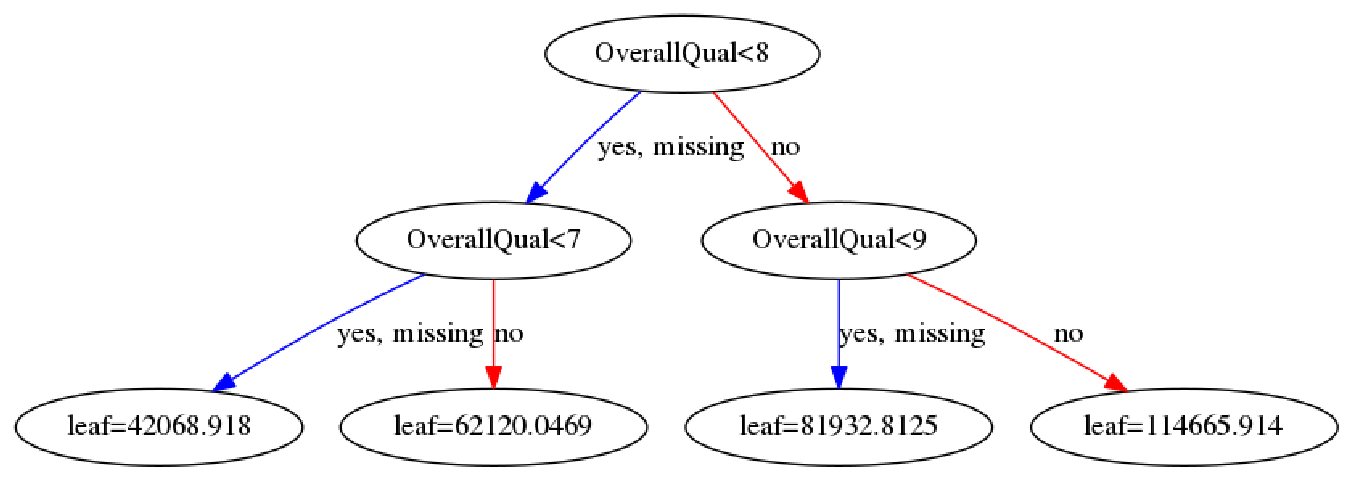

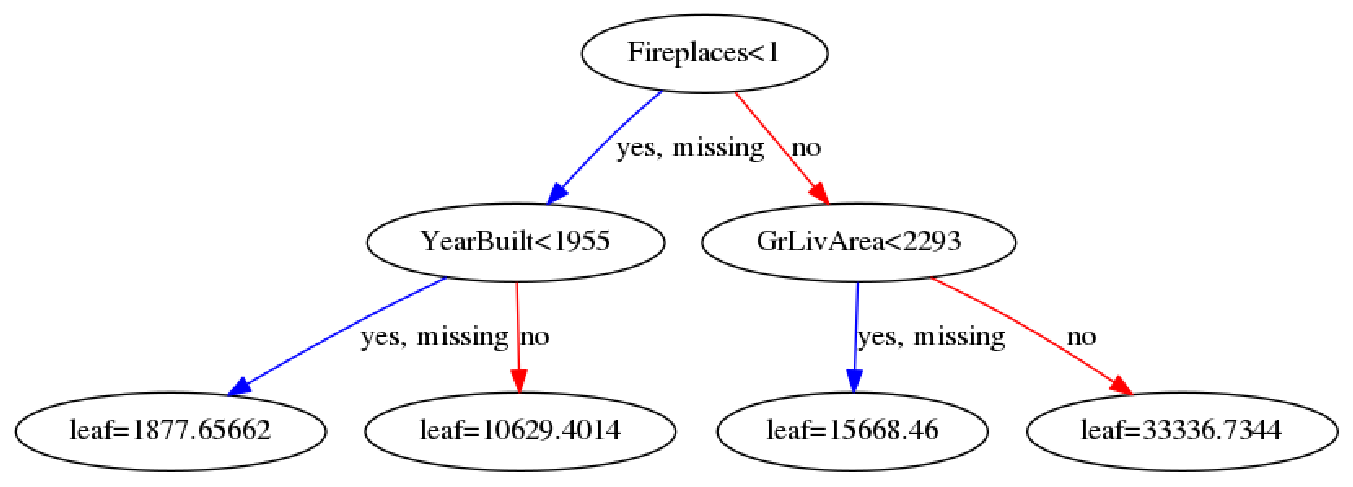

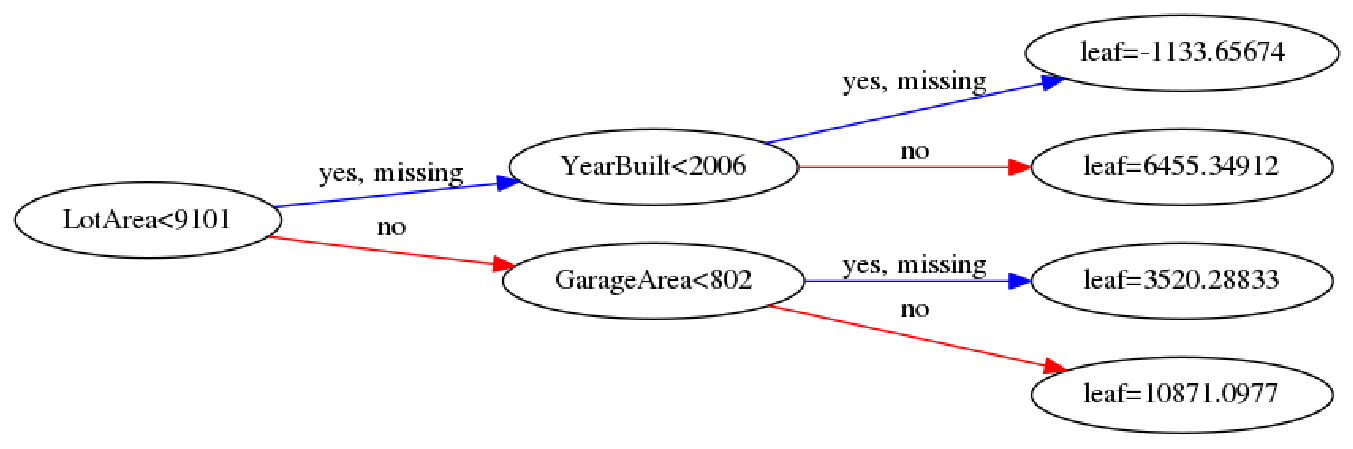

In [11]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")

[18:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


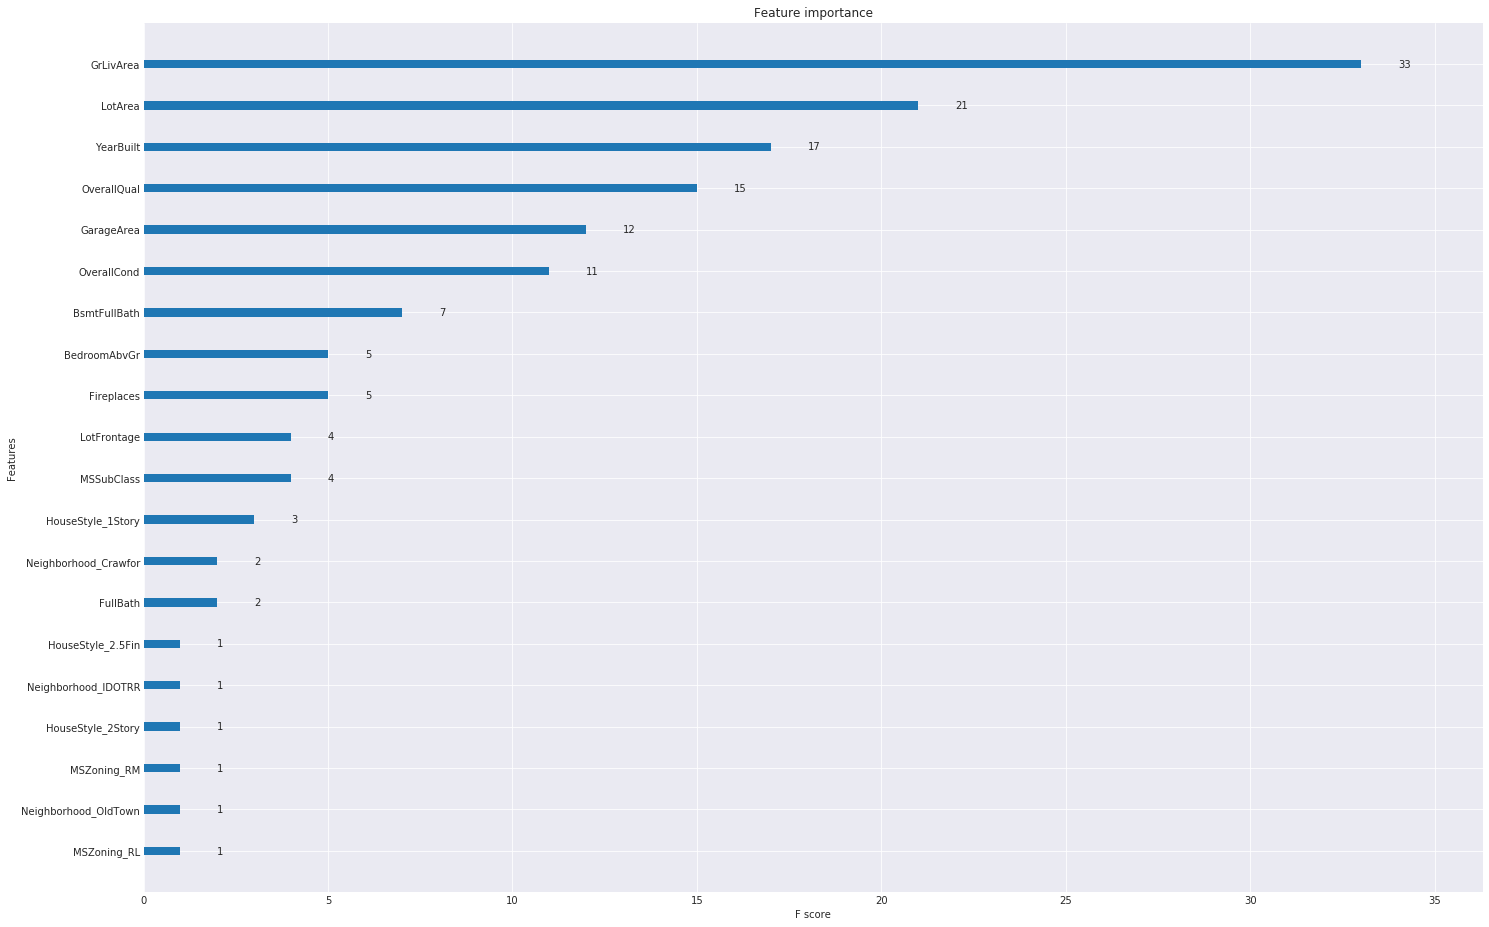

In [13]:
# Create the DMatrix: housing_matrix
housing_matrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {'objective':'reg:linear', 'max_depth':4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_matrix, num_boost_round=10)

# Plot the feature importance
xgb.plot_importance(xg_reg)
plt.show()

In [12]:
?xgb.train

Signature:
xgb.train(
    params,
    dtrain,
    num_boost_round=10,
    evals=(),
    obj=None,
    feval=None,
    maximize=False,
    early_stopping_rounds=None,
    evals_result=None,
    verbose_eval=True,
    xgb_model=None,
    callbacks=None,
    learning_rates=None,
)
Docstring:
Train a booster with given parameters.

Parameters
----------
params : dict
    Booster params.
dtrain : DMatrix
    Data to be trained.
num_boost_round: int
    Number of boosting iterations.
evals: list of pairs (DMatrix, string)
    List of items to be evaluated during training, this allows user to watch
    performance on the validation set.
obj : function
    Customized objective function.
feval : function
    Customized evaluation function.
maximize : bool
    Whether to maximize feval.
early_stopping_rounds: int
    Activates early stopping. Validation error needs to decrease at least
    every **early_stopping_rounds** round(s) to continue training.
    Requires at least one item in **evals**.